In [1]:
#from collections import defaultdict
#from pathlib import Path
import json

import os 
import time 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
russell_df = pd.read_csv('russell_3000_index.csv')

ticker_list = russell_df['Ticker']

In [3]:
#seeding the DataFrame
#reading the data from a file
with open('SCT_datasets/A_SCTpay_20220906.txt') as f:
    a_txt = f.read()
    
#converting the text string into a dictionary
a_dict = json.loads(a_txt)

starter_df = pd.DataFrame(a_dict)

In [4]:
start_time = time.time()

for ticker in ticker_list:
    try:
        with open(f'SCT_datasets/{ticker}_SCTpay_20220906.txt') as f:
            ticker_txt = f.read()
        ticker_dict = json.loads(ticker_txt)    
        #ticker_df = pd.DataFrame(ticker_dict)
        starter_df = pd.concat([starter_df,pd.DataFrame(ticker_dict)])
    except:
        print(f'Ticker {ticker} threw an error')
    
        
        
print(f"This code took {time.time() - start_time} seconds")

Ticker XTSLA threw an error
Ticker USD threw an error
Ticker MANH threw an error
Ticker MPW threw an error
Ticker AFG threw an error
Ticker GLOB threw an error
Ticker RRC threw an error
Ticker UGI threw an error
Ticker MSFUT threw an error
Ticker ESU2 threw an error
Ticker RTYU2 threw an error
This code took 31.66491389274597 seconds


In [5]:
starter_df.reset_index(inplace=True,drop=True)

In [7]:
#removing tickers with known mistakes
mistakes_df = pd.read_csv('mistakes.csv').drop(columns='Unnamed: 0')
mistakes_df['ticker'].value_counts()

starter_df[starter_df['ticker'].isin(set(mistakes_df['ticker'])) == False].reset_index(drop=True,inplace=True)

starter_df.head(3)

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN


In [8]:
ceo_title_list = ['CHIEF EXECUTIVE','CEO']
cfo_title_list = ['CHIEF FINANC','CFO']
interim_title_list = ['INTERIM','ACTING']

ceo_regstr = '|'.join(ceo_title_list)
cfo_regstr = '|'.join(cfo_title_list)
interim_regstr = '|'.join(interim_title_list)

# https://stackoverflow.com/questions/49508281/check-if-multiple-substrings-are-in-pandas-dataframe
starter_df['CEO'] = starter_df['position'].str.upper().str.contains(ceo_regstr)
starter_df['CFO'] = starter_df['position'].str.upper().str.contains(cfo_regstr)
starter_df['Interim'] = starter_df['position'].str.upper().str.contains(interim_regstr)

In [9]:
ceo_df = starter_df[(starter_df['CEO']==True)]
ceo_df.reset_index(inplace=True)

ceo_2021_df = starter_df[(starter_df['CEO']==True) & (starter_df['year']==2021)]
ceo_2021_df.reset_index(inplace=True)

cfo_2021_df = starter_df[(starter_df['CFO']==True) & (starter_df['year']==2021)]
cfo_2021_df.reset_index(inplace=True)

In [10]:
ceo_df = ceo_df[(ceo_df['salary'] > 0) & (ceo_df['year'] > 2005)]

In [11]:
#https://www.statology.org/deciles-in-python/
percentile_ceo_2021 = np.percentile(ceo_df[ceo_df['year'] == 2021]['salary'], np.arange(0,100,5))
percentile_ceo_2020 = np.percentile(ceo_df[ceo_df['year'] == 2020]['salary'], np.arange(0,100,5))
percentile_ceo_2019 = np.percentile(ceo_df[ceo_df['year'] == 2019]['salary'], np.arange(0,100,5))
percentile_ceo_2018 = np.percentile(ceo_df[ceo_df['year'] == 2018]['salary'], np.arange(0,100,5))
percentile_ceo_2017 = np.percentile(ceo_df[ceo_df['year'] == 2017]['salary'], np.arange(0,100,5))
percentile_ceo_2016 = np.percentile(ceo_df[ceo_df['year'] == 2016]['salary'], np.arange(0,100,5))
percentile_ceo_2015 = np.percentile(ceo_df[ceo_df['year'] == 2015]['salary'], np.arange(0,100,5))
percentile_ceo_2014 = np.percentile(ceo_df[ceo_df['year'] == 2014]['salary'], np.arange(0,100,5))
percentile_ceo_2013 = np.percentile(ceo_df[ceo_df['year'] == 2013]['salary'], np.arange(0,100,5))
percentile_ceo_2012 = np.percentile(ceo_df[ceo_df['year'] == 2012]['salary'], np.arange(0,100,5))

data_list = [percentile_ceo_2012,percentile_ceo_2013,percentile_ceo_2014,percentile_ceo_2015,percentile_ceo_2016,percentile_ceo_2017,
            percentile_ceo_2018,percentile_ceo_2019,percentile_ceo_2020,percentile_ceo_2021]
index_list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

percentile_df = pd.DataFrame(data_list,index=index_list,columns=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
percentile_df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
2012,1.0,196249.70,300000.0,357873.40,406221.8,451150.00,500000.0,525000.00,567276.4,600000.00,660000.0,724433.00,771245.6,819249.80,891155.6,952986.50,1000000.0,1050025.00,1191845.8,1440990.00
2013,1.0,199997.30,314583.0,375000.00,422410.8,474828.00,500000.0,547313.10,596152.2,625380.85,685000.0,742777.05,791909.2,840471.10,900000.0,970476.25,1000000.0,1069254.45,1200000.0,1452027.70
2014,1.0,206972.15,315766.6,379743.25,435826.8,489406.50,519619.8,557367.65,600000.0,648889.65,698521.0,750000.00,800000.0,850312.30,906324.8,972115.00,1000000.0,1071200.15,1200000.0,1464652.35
2015,1.0,231064.20,327176.8,390190.60,444591.6,493204.00,525000.0,575000.00,613887.6,650004.60,700000.0,750000.00,800730.4,862188.00,917051.6,980905.00,1000000.0,1089797.60,1233000.0,1496943.20
2016,1.0,210500.00,333000.5,399279.00,448294.0,495000.00,525216.0,577465.25,625000.0,663659.00,703059.0,753045.25,800267.0,865246.25,932106.5,992291.75,1000000.0,1096846.25,1236750.0,1494298.25
2017,1.0,198292.90,349934.0,406298.00,450000.0,500000.00,538031.2,599011.10,641667.0,692013.10,726335.0,772710.00,824563.2,875852.00,928942.2,996108.00,1003582.4,1100000.00,1241538.6,1438580.00
2018,1.0,206775.55,350000.0,413655.80,469708.4,507234.00,550000.0,600000.00,643939.6,700000.00,739059.0,776587.30,833337.0,895791.35,945000.0,999987.75,1013323.4,1109533.90,1250000.0,1461533.00
2019,1.0,212884.50,346478.0,410300.00,474126.2,500000.00,550000.0,598316.20,645028.0,700000.00,750000.0,792366.00,840100.0,900000.00,949517.6,999999.50,1024384.8,1129641.90,1250000.0,1499992.00
2020,1.0,206250.00,318615.8,400000.00,452195.4,500000.00,540000.0,582499.80,618569.4,659346.10,705754.0,753846.00,800000.0,850000.00,908767.6,961058.00,1001913.0,1099192.40,1219400.0,1423445.70
2021,1.0,232788.15,372653.9,450000.00,500000.0,543677.25,590008.3,628391.90,673810.4,720000.00,757750.0,810754.60,854557.4,901592.10,963503.3,1000000.00,1049413.6,1140365.75,1250000.0,1487435.50


<AxesSubplot:>

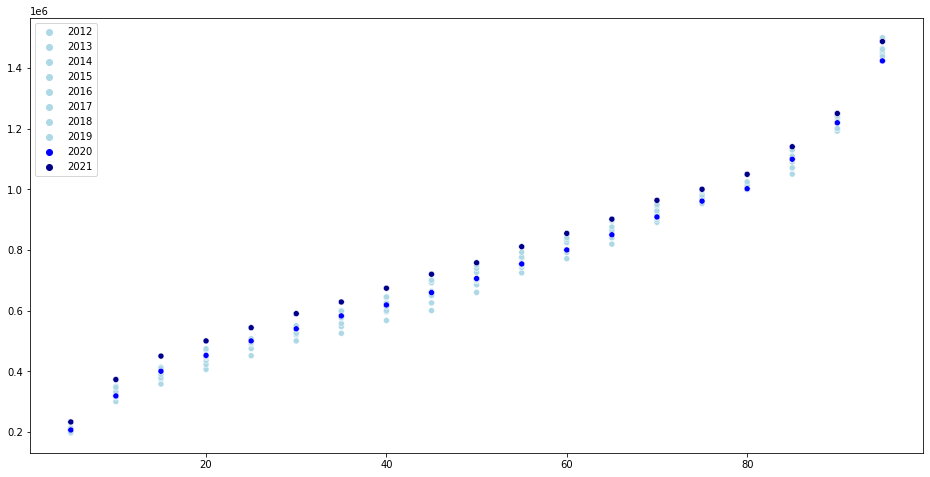

In [12]:
my_palette = ['lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','lightblue','blue','darkblue']
my_size = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,1.5]
my_marker = ['o','o','o','o','o','o','o','o','o','o']

plt.figure(figsize=(16,8))
sns.scatterplot(data=percentile_df.drop(columns=[0]).T,
                palette=my_palette,
                markers=my_marker,
                size_order=my_size)

### BoxPlots for CEO Pay Components
#### Salary

In [13]:
ceo_df['year'] = ceo_df['year'].astype('category')

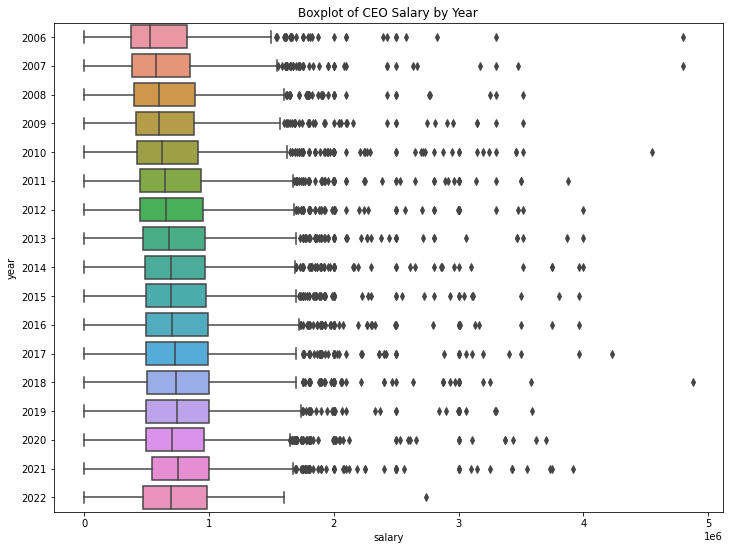

In [14]:
plt.figure(figsize=(12,9))
sns.boxplot(data=ceo_df[ceo_df['salary'] < 5000000],x='salary',y='year')
plt.title("Boxplot of CEO Salary by Year");

<AxesSubplot:xlabel='salary', ylabel='year'>

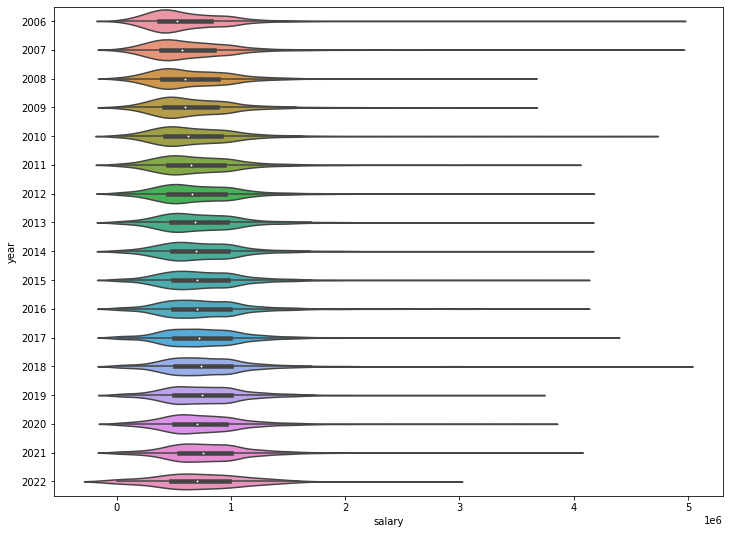

In [15]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['salary'] < 5000000],x='salary',y='year')

<Figure size 864x216 with 0 Axes>

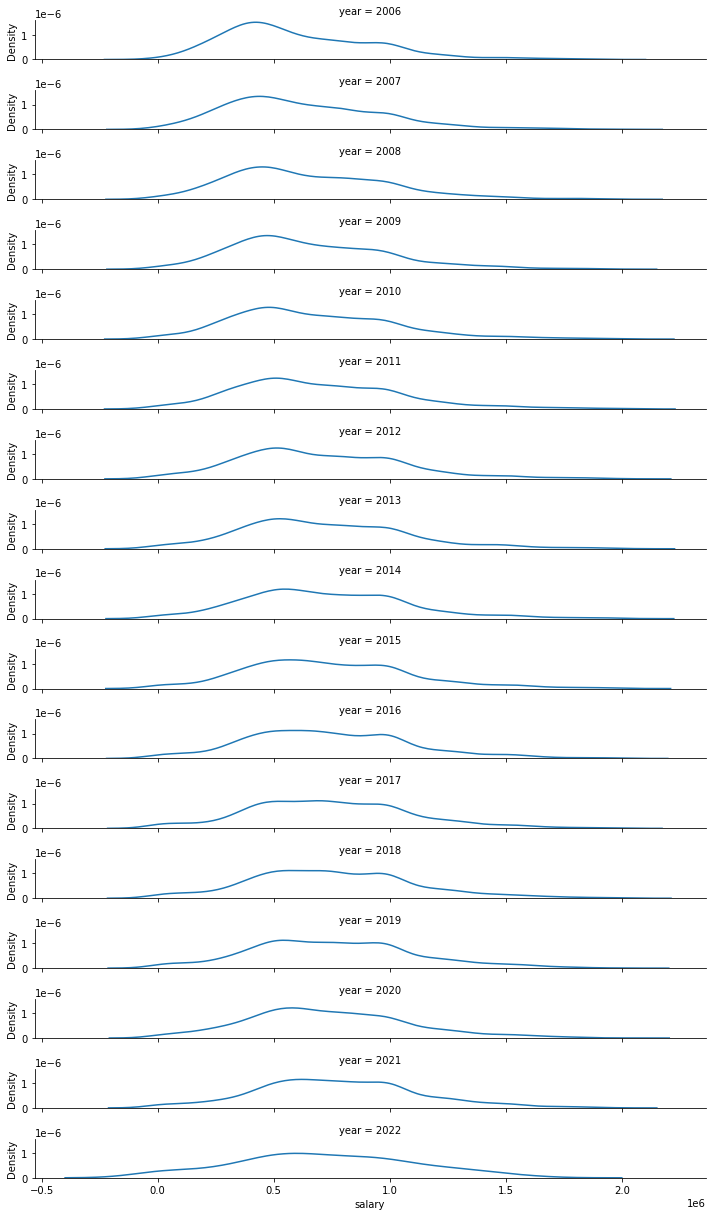

In [16]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['salary'] < 2000000], row='year',aspect=10,height=1)
g.map(sns.kdeplot, 'salary')#,bins=50,kde=True,stat='density')

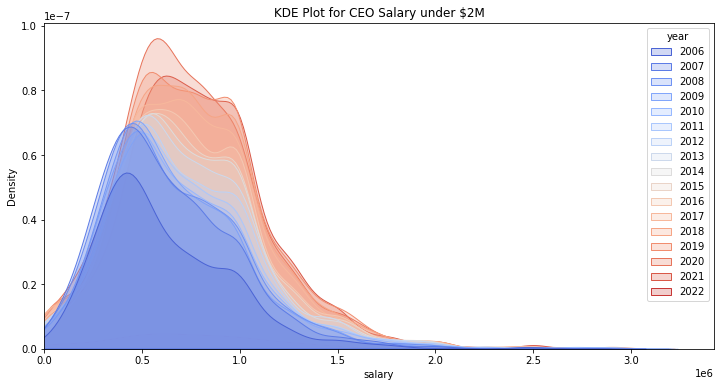

In [17]:
#sns.boxplot(data=ceo_df[ceo_df['stockAwards'] < 50000000],x='stockAwards',y='year')

plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[ceo_df['salary'] < 3000000], x='salary',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for CEO Salary under $2M')
plt.xlim(0,);

#### Stock Awards

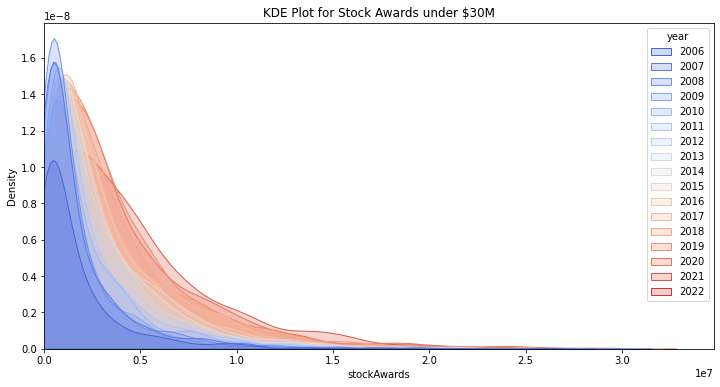

In [18]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['stockAwards'] < 30000000) & (ceo_df['stockAwards']>0)], x='stockAwards',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for Stock Awards under $30M')
plt.xlim(0,);

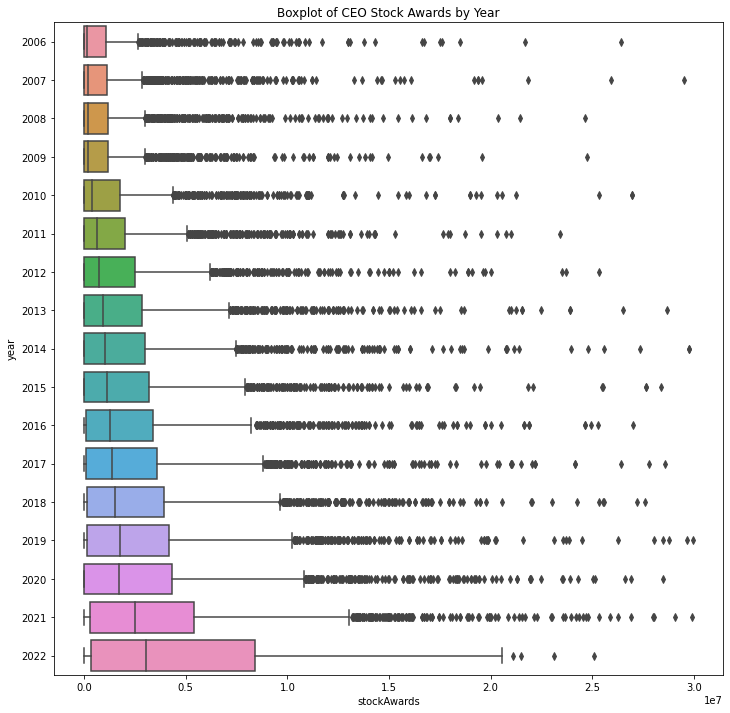

In [19]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['stockAwards'] < 30000000],x='stockAwards',y='year')
plt.title('Boxplot of CEO Stock Awards by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

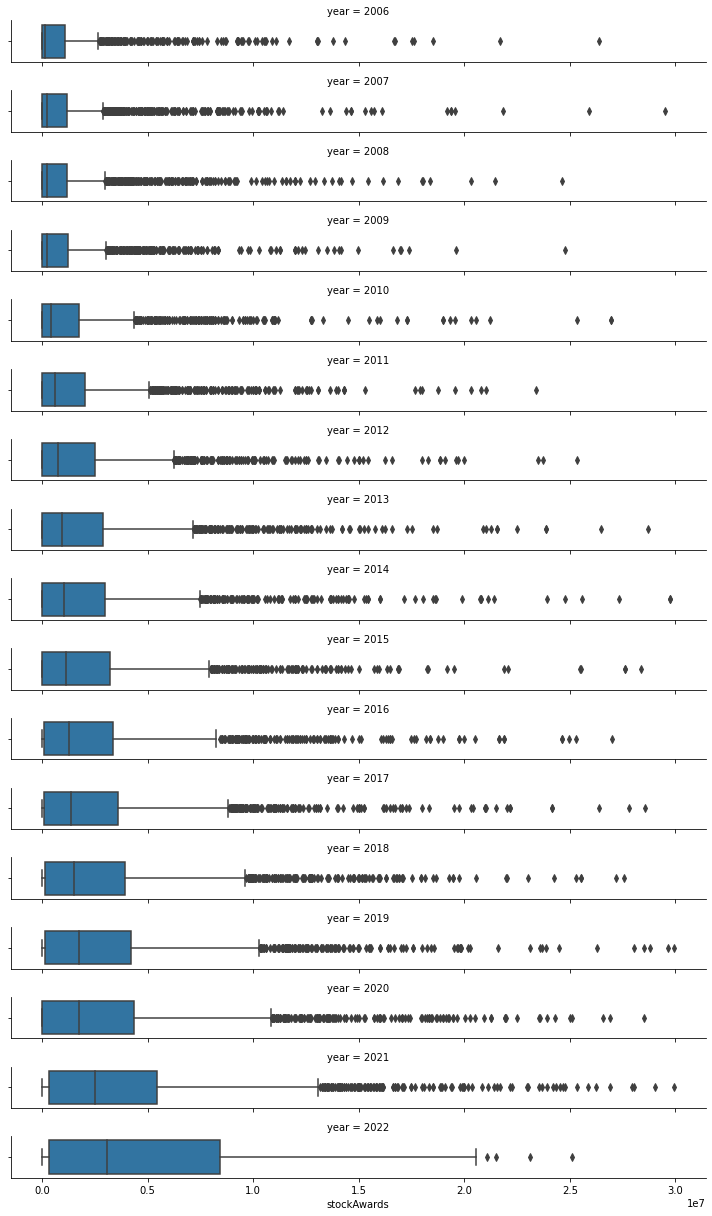

In [20]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['stockAwards'] < 30000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'stockAwards')

<AxesSubplot:xlabel='stockAwards', ylabel='year'>

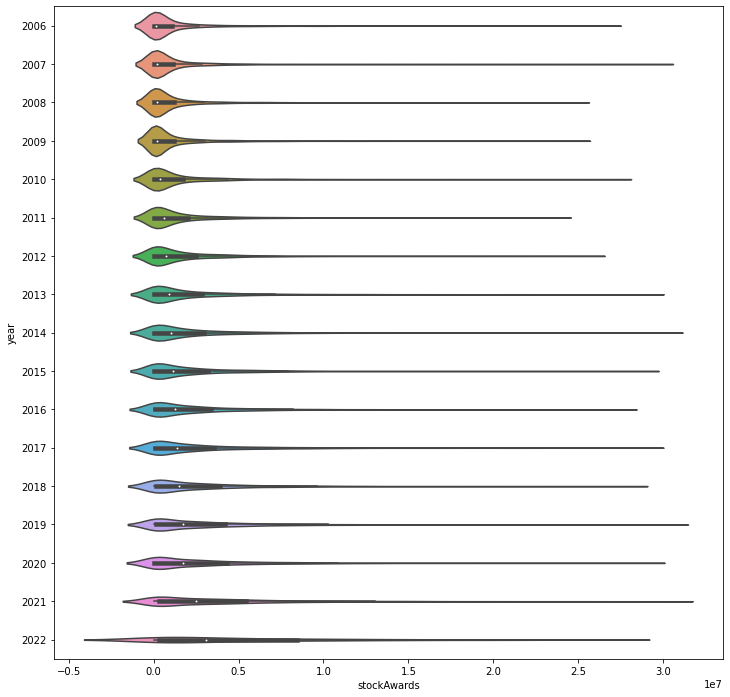

In [21]:
plt.figure(figsize=(12,12))
sns.violinplot(data=ceo_df[ceo_df['stockAwards'] < 30000000],x='stockAwards',y='year')

#### Performance Bonus Awards

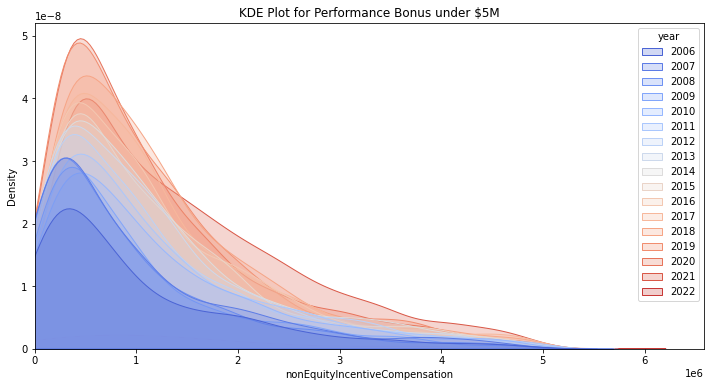

In [22]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['nonEquityIncentiveCompensation'] < 5000000) & (ceo_df['nonEquityIncentiveCompensation']>0)], 
            x='nonEquityIncentiveCompensation',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for Performance Bonus under $5M')
plt.xlim(0,);

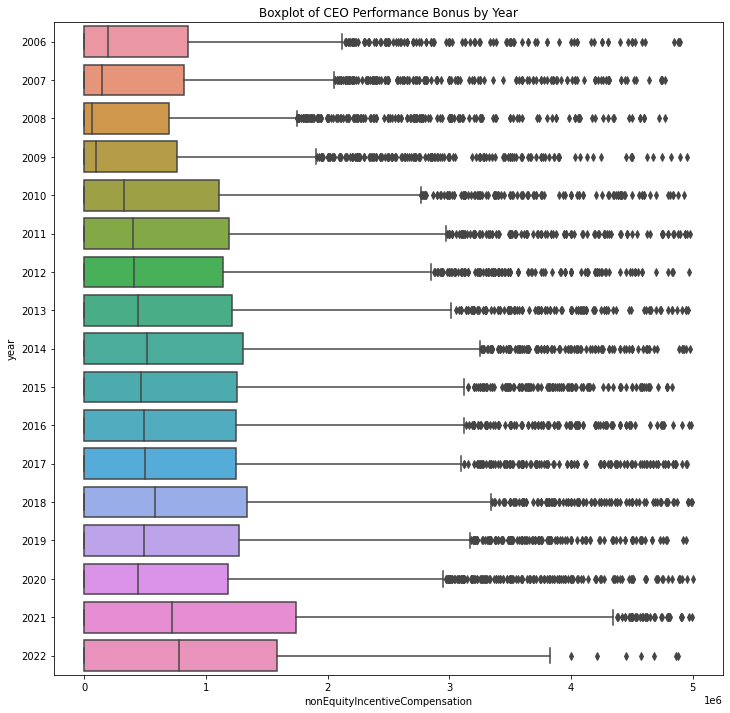

In [23]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000],x='nonEquityIncentiveCompensation',y='year')
plt.title('Boxplot of CEO Performance Bonus by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

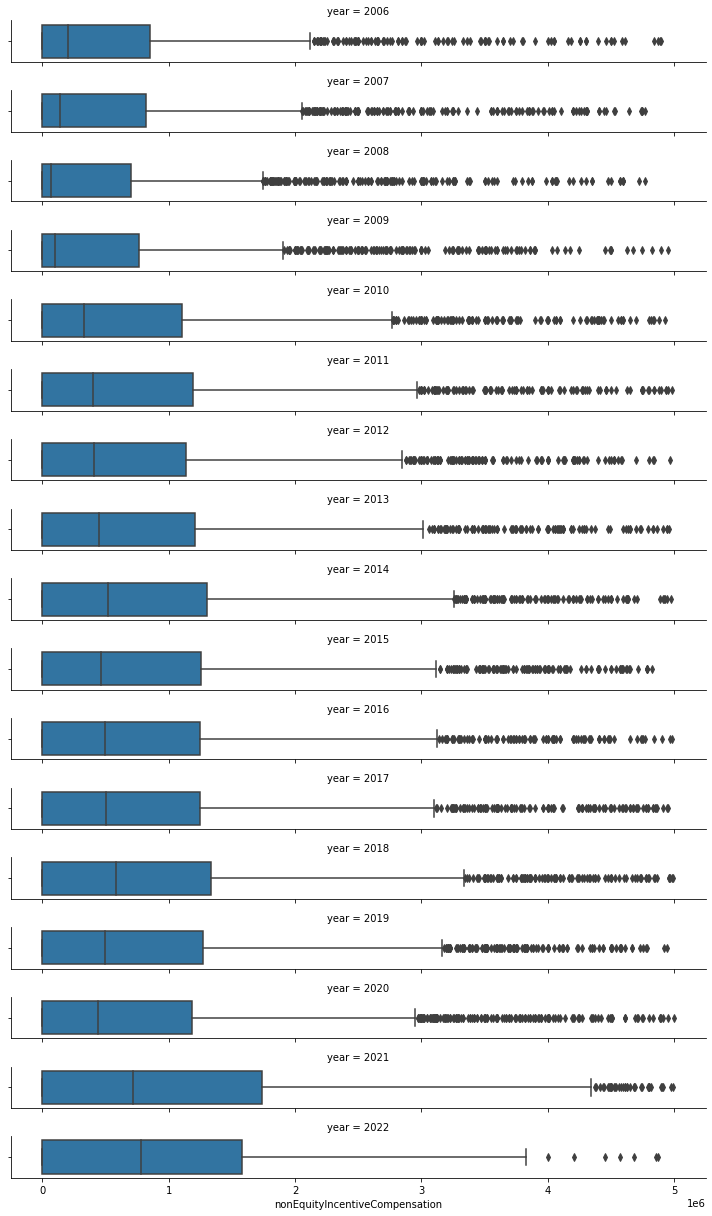

In [24]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'nonEquityIncentiveCompensation')

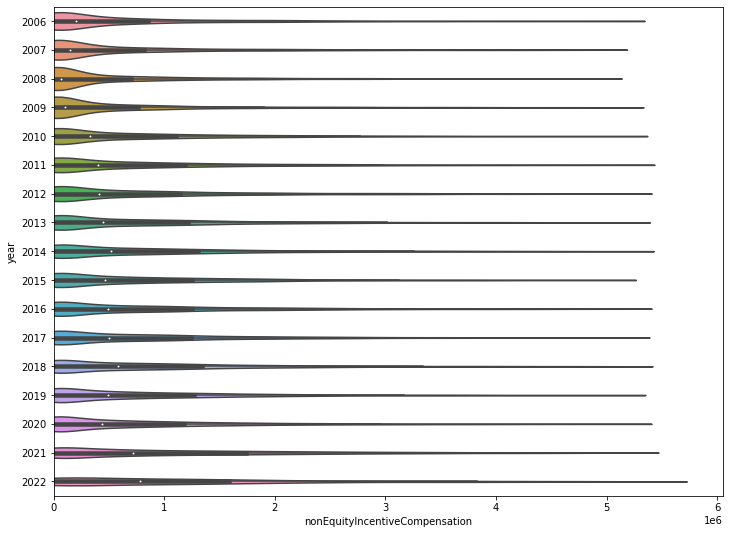

In [25]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000],x='nonEquityIncentiveCompensation',y='year')
plt.xlim(0,);

#### SCT Total

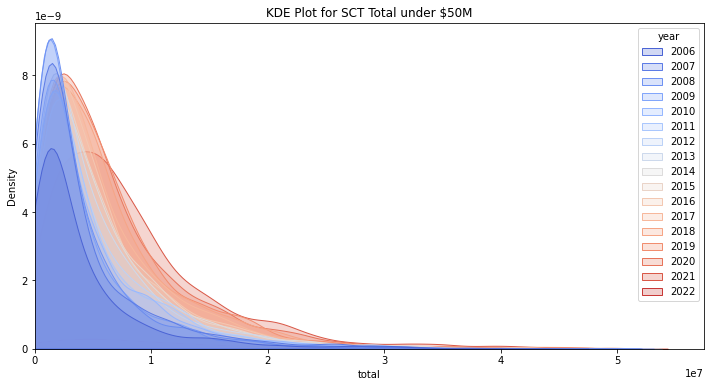

In [26]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['total'] < 50000000) & (ceo_df['total']>0)], 
            x='total',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for SCT Total under $50M')
plt.xlim(0,);

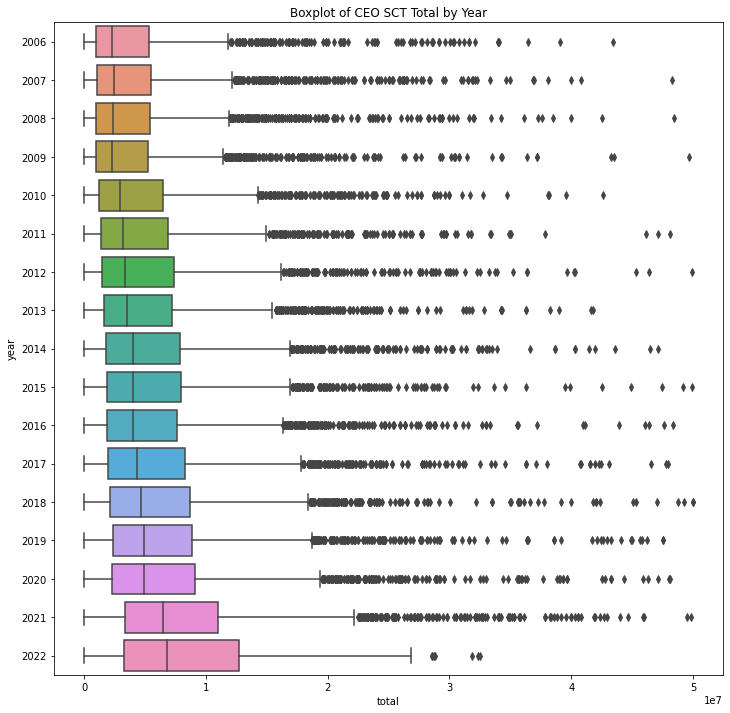

In [27]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['total'] < 50000000],x='total',y='year')
plt.title('Boxplot of CEO SCT Total by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

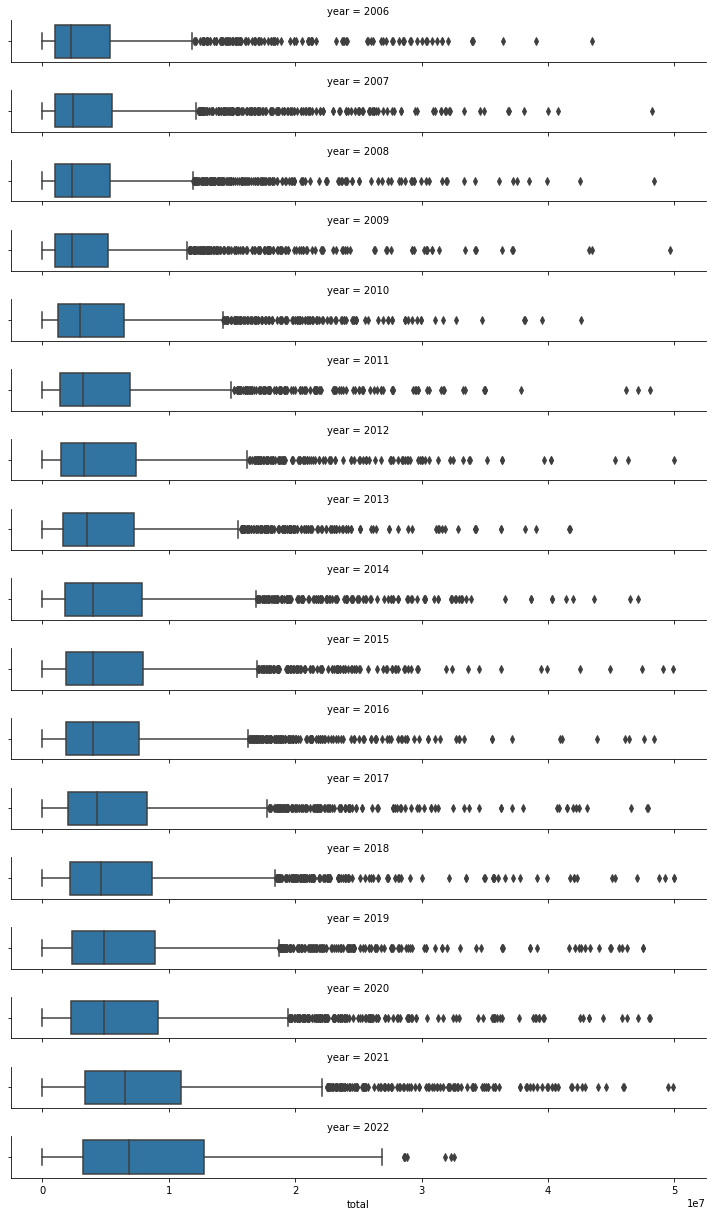

In [28]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['total'] < 50000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'total')

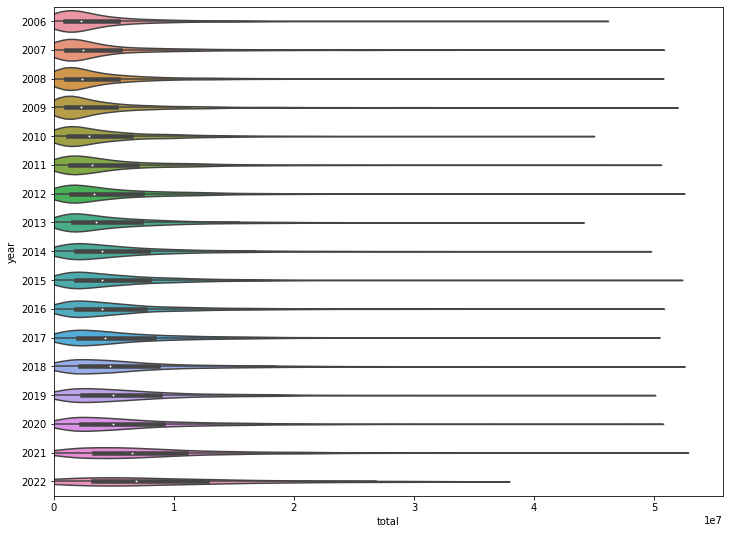

In [29]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['total'] < 50000000],x='total',y='year')
plt.xlim(0,);

In [44]:
print("Count of CEOs by year:")
print(starter_df[(starter_df['CEO'] == True) & (starter_df['Interim'] == False)].groupby('year')['CEO'].sum())

Count of CEOs by year:
year
2004       1
2005      53
2006    1443
2007    2013
2008    2079
2009    2038
2010    2073
2011    2128
2012    2201
2013    2344
2014    2394
2015    2459
2016    2545
2017    2691
2018    2816
2019    2968
2020    3052
2021    2827
2022     182
Name: CEO, dtype: int64


In [48]:
ceo_df['salary'].quantile(0.99)

2087166.4100000535

In [53]:
ticker_series = starter_df.groupby('year')['ticker'].nunique()
ceo_series = starter_df[(starter_df['CEO'] == True) & (starter_df['Interim'] == False)].groupby('year')['CEO'].sum()

pd.DataFrame([ticker_series, ceo_series]).T

,ticker,CEO
year,,
2004,1,1
2005,49,53
2006,1203,1443
2007,1545,2013
2008,1587,2079
2009,1614,2038
2010,1644,2073
2011,1691,2128
2012,1753,2201
